In [ ]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np

In [ ]:
a, b = 12, 6
rects = [(4, 4), (2, 3), (3, 3), (4, 5), (1, 6), (3, 3), (1, 8), (1, 10), (2, 7), (3, 5)]

rects = [r for r in rects if r[0] <= a and r[1] <= b]
n = len(rects)

rs = random.Random(142)

lb, ub = [], []
for i in range(n):
    lb.extend([0, 0, 0])
    ub.extend([a - rects[i][0], b - rects[i][1], 1])
    
def generate_sample(rs):
    x0 = [rs.randint(lb[i], ub[i]) for i in range(3 * n)]        
    return x0

([7, 0, 1, 4, 2, 1, 4, 0, 0, 4, 0, 0, 9, 0, 1, 3, 0, 1, 8, 1, 0], None)

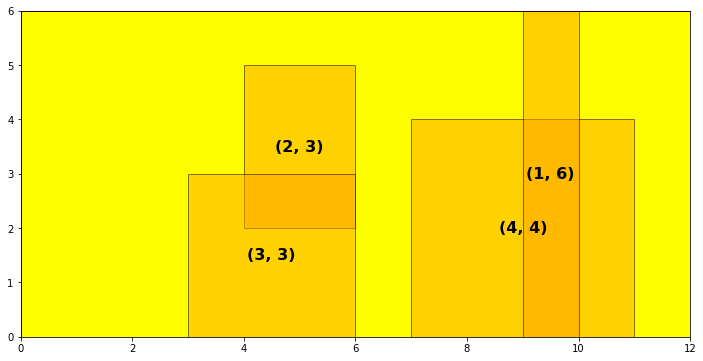

In [ ]:
def plot_area(x0):
    fig,ax = plt.subplots(1, figsize=(a, b))
    r = patches.Rectangle((0, 0), a, b, linewidth=1, edgecolor='r', facecolor='yellow')
    ax.add_patch(r);
    ax.set_xlim(0, a)
    ax.set_ylim(0, b)
    for i in range(n):
        if x0[3 * i + 2] == 1:
            r0 = patches.Rectangle((x0[3 * i], x0[3 * i + 1]), rects[i][0], rects[i][1], 
                                   linewidth=1, 
                                   edgecolor='k', 
                                   facecolor='orange',
                                   alpha=0.5)
            ax.add_patch(r0)
            rx, ry = r0.get_xy()
            cx = rx + r0.get_width()/2.0
            cy = ry + r0.get_height()/2.0
            ax.annotate('(%i, %i)' % (rects[i][0], rects[i][1]), (cx, cy), color='k', weight='bold', fontsize=16, ha='center', va='center')


x0 = generate_sample(rs)
x0, plot_area(x0)  

(31.0, 37, -29.0)

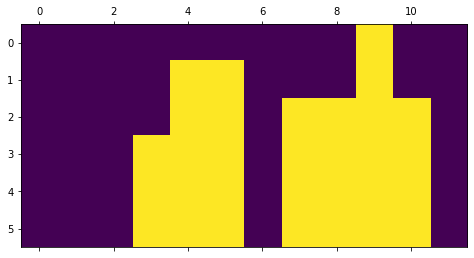

In [ ]:
def calc_matrix(x0):
    A = np.zeros((a, b))
    for i in range(n):
        if x0[3 * i + 2] == 1:
            A[x0[3 * i]: x0[3 * i] + rects[i][0], 
              x0[3 * i + 1]: x0[3 * i + 1] + rects[i][1]] = 1
    A = np.flip(A.T, 0)
    return A

def calc_area(x0):
    return calc_matrix(x0).sum()

def calc_total(x0):
    return sum(rects[i][0] * rects[i][1] * x0[3 * i + 2] for i in range(n))

def fitness(x0, penalty=10):
    return calc_area(x0) - (calc_total(x0) - calc_area(x0)) * penalty

plt.matshow(calc_matrix(x0))
calc_area(x0), calc_total(x0), fitness(x0)

In [ ]:
population_size = 200
n_generations = 1000
n_best_parents = 20
num_mutations = 2

best_fitnesses = []
best_individuals = []
avg_best = []
avg_pop = []
avg_half = []

population = []
while len(population) < population_size:
    new = generate_sample(rs) 
    if new not in population:
        population.append(new)
    
for g in range(n_generations):
    if (g + 1)%100 == 0: print('Generation #%i populated.' % (g + 1))
    fs = [fitness(p) for p in population]
    best_parents = [pp[1] for pp in sorted(zip(fs, population), reverse=True)[: n_best_parents]]
    
    best_fitnesses.append(max(fs))
    avg_best.append(np.mean(sorted(fs, reverse=True)[: n_best_parents]))
    avg_pop.append(np.mean(fs))
    avg_half.append(np.mean(sorted(fs, reverse=True)[: population_size // 2]))
    best_individuals.append(best_parents[0])
    
    population = best_parents 
    while len(population) < population_size:
        parent1 = rs.choice(best_parents)
        parent2 = rs.choice(best_parents) 
        
        split_idx = (3 * n) // 2
        offspring = parent1[: split_idx] + parent2[split_idx: ]
        
        for _ in range(num_mutations):
            mutation_idx = rs.randrange(0, 3 * n)
            offspring[mutation_idx] = rs.randint(lb[mutation_idx], ub[mutation_idx])
            
        if offspring not in population:
            population.append(offspring)

Generation #100 populated.
Generation #200 populated.
Generation #300 populated.
Generation #400 populated.
Generation #500 populated.
Generation #600 populated.
Generation #700 populated.
Generation #800 populated.
Generation #900 populated.
Generation #1000 populated.


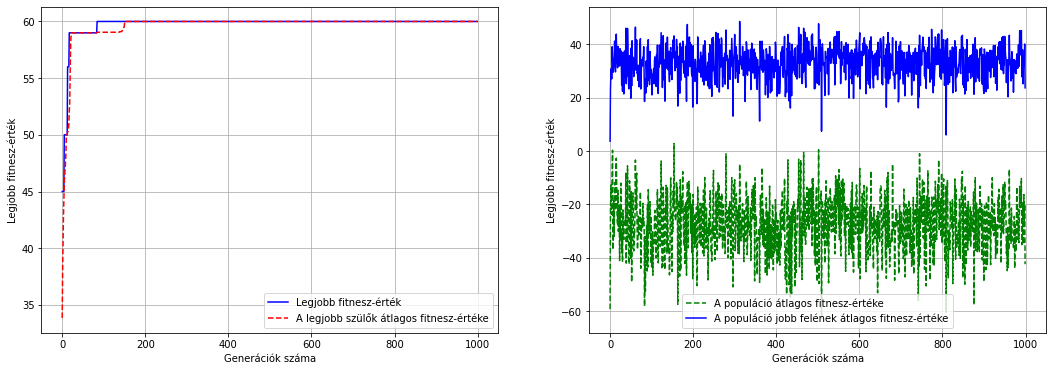

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
ax[0].plot(best_fitnesses, 'b-', label='Legjobb fitnesz-érték')
ax[0].plot(avg_best, 'r--', label='A legjobb szülők átlagos fitnesz-értéke')
ax[1].plot(avg_pop, 'g--', label='A populáció átlagos fitnesz-értéke')
ax[1].plot(avg_half, 'b-', label='A populáció jobb felének átlagos fitnesz-értéke')

for aa in ax:
    aa.set_xlabel('Generációk száma')
    aa.set_ylabel('Legjobb fitnesz-érték')
    aa.grid(True)
    aa.legend()

(60.0, None)

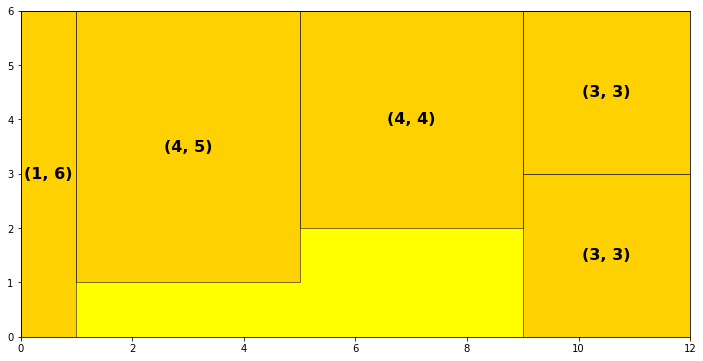

In [ ]:
best_fitnesses[-1], plot_area(best_parents[0])

Ebben a példában már nehezebben látható be, hogy valóban a legjobb egyed készült el. Ha megpróbáljuk heurisztikusan megoldani a problémát, arra fogunk jutni, hogy valóban ez a legkedvezőbb elrendezés. Azonban ez a megoldási mód sokkal több időt vesz igénybe.

Próbáljuk ki, vajon a számítógép szintjén megéri-e a GA használata, és nem jutunk-e hamarabb eredményre egyszerű próbálkozással:\
(Figyelem: A válasz "nem". Az alábbi kódrészlet futtatása 8-10 percet is igénybe vehet!)

In [17]:
for _ in range(3):
    cnt = 0
    ss = 0
    while ss < 60:
        smp = generate_sample(rs)
        ss = fitness(smp)
        cnt += 1

    print(cnt)

3007601
6221582
4550097


Látható, hogy többmillió próbálkozás szükséges, mire előáll a legkedvezőbb eset. Ehhez pedig nagyságrendekkel több időre volt szükség, mint a GA-t használva.